<a href="https://colab.research.google.com/github/vrishi220/MachineLearning/blob/master/MLhw1prob5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Actual Epoch: 1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:63: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/1
 - 2s - loss: 0.3833 - acc: 0.8646 - val_loss: 0.2218 - val_acc: 0.9305

Actual Epoch: 2
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
 - 2s - loss: 0.1886 - acc: 0.9385 - val_loss: 0.1500 - val_acc: 0.9520

Actual Epoch: 3
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
 - 2s - loss: 0.1399 - acc: 0.9556 - val_loss: 0.1226 - val_acc: 0.9591

Actual Epoch: 4
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
 - 2s - loss: 0.1176 - acc: 0.9618 - val_loss: 0.1090 - val_acc: 0.9646

Actual Epoch: 5
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
 - 2s - loss: 0.1036 - acc: 0.9665 - val_loss: 0.0983 - val_acc: 0.9678

Actual Epoch: 6
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
 - 2s - loss: 0.0938 - acc: 0.9700 - val_loss: 0.0944 - val_acc: 0.9684

Actual Epoch: 7
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
 - 2s - loss: 0.0852 - acc: 0.9727 - val_loss:

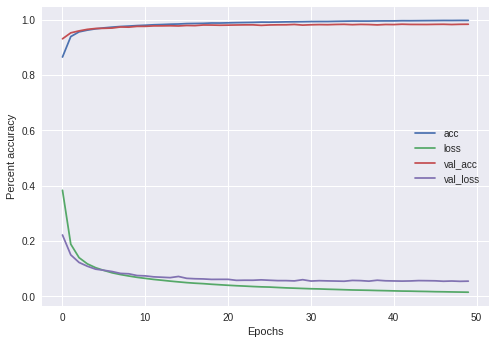

In [6]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np

rate, batch_size, classes_size, epochs, input_size, final  = 0.05, 100, 10, 50, 28**2, []

# batch_size = 128
# num_classes = 10
# epochs = 30

# Reshape the training and testing data of a single dimension by 28*28. 
# Then the values of the reshaped vector are taken as float32 values for the ease of readability.
# Then the values are divided by 255 (max count for colors) so as to make all values withiin 0 to 1.
def reshapeAndReduce(X): return X.reshape(X.shape[0],X.shape[1]*X.shape[2]).astype('float32')/255

# Convert vector into an Numpy array of one-hot-encodings which are float values
def getOneHot(X,classes_size):
  one_hot_vec = []
  for i in X: one_hot_vec.append([1 if x == i else 0 for x in range(classes_size)])
  return np.array(one_hot_vec).astype('float32')

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# TODO
for each in (y_train, y_test):
  for i in range(each.shape[0]):
    if each[i] == 8: each[i] = 3
    elif each[i] in [0,6,9]: each[i] = 2
    else: each[i] = 1

# Reshape the training and test data.
X_train, X_test = reshapeAndReduce(x_train), reshapeAndReduce(x_test)

# Convert class vector to binary class matrix (one-hot-encoding).
Y_train, Y_test = getOneHot(y_train, classes_size), getOneHot(y_test, classes_size)

# Initialize a sequential model
model = Sequential()

#Add two dense layers, one with 100 neurons and another with 10 for output. 
#The first utilizes the relu activstion function and the other utilizes softmax activation function
model.add(Dense(units = 100, activation = 'relu'))
model.add(Dense(units = 10, activation = 'softmax'))

# Compile loss with Categorical Cross Entropy and utiize the Stochastic Gradient Descent with a learning rate of 0.05. 
# We pull metrics for Accuracy 
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.SGD(lr=rate),metrics=['accuracy'])

# Initialize a dictionary which contains an array for the 4 main metrics
fit_history = {'acc':[],'loss':[],'val_acc':[],'val_loss':[]}

# Iterate through each epoch
for i in range(epochs):
  
  # Show current epoch
  print('\nActual Epoch: {}'.format(i+1))
  
  # For each epoch train the model against X_train and Y_train and a given test data of X_test and Y_test
  hist = model.fit(X_train, Y_train, batch_size = batch_size, nb_epoch = 1, verbose = 2, validation_data = (X_test, Y_test))
  
  # Push the 4 main updated metrics for each run to the fit history dictionaries. This will be used for building a metric plot.
  for each in fit_history: fit_history[each].append(hist.history[each])

# hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

# Print out the final metrics once the model is evaluated against the test data
for i in range(2): print('\nFinal {} of test data: {}%'.format('Loss'if i==0 else 'Accuracy',model.evaluate(X_test, Y_test, verbose = 0)[i]*100))

# Plot the training metrics
for each in fit_history: k = plt.plot(fit_history[each], label=each)

# Show Plot with legend
plt.xlabel('Epochs'); plt.ylabel('Percent accuracy'); plt.legend()
